#### Business Overview
Time series refers to a collection of data points gathered at regular time intervals from a particular entity. The primary question that businesses ask is how past events have affected future outcomes. Forecasting involves using historical data to estimate future observations. Time series forecasting is a statistical method used to analyze data collected over time to predict future trends. It involves analyzing patterns in time-based data to develop accurate models for forecasting future behaviors. Time series data is relevant in a wide range of applications, from supply chain management and stock market analysis to weather forecasting and biomedical monitoring.

Forecasting has two main use cases: predicting store sales to manage inventory demand and plan for the future, and forecasting ride-hailing demand to optimize pricing and supply chain management. One of the key benefits of forecasting is that it enables businesses to plan their sales and inventory management around holidays and other events, maximizing profitability. In this project, we will use Walmart store sales data to predict future store sales. To achieve this, we will leverage the Greykite Python library developed by LinkedIn and the Neural Prophet model developed by Facebook. 

#### Goal
To predict future demand/sales using historical data and other related features. 


#### Data Description
The dataset under consideration pertains to Walmart store sales data. Walmart is a multinational retail corporation based in the United States, operating various types of stores including hypermarkets, department stores, and grocery stores. The dataset includes historical sales data for 45 Walmart stores located in different regions, each consisting of multiple departments. The data is provided in the form of four distinct datasets, which are described below.

The first dataset, Stores.csv, provides information about the 45 stores, including their type and size.

The second dataset, Train.csv, contains historical training data spanning from 2010-02-05 to 2012-11-01.

The third dataset, Test.csv, is similar to Train.csv, with the exception of the weekly sales figures, which are to be predicted.

Finally, the fourth dataset, Features.csv, includes additional information related to store, department, and regional activity for the given dates.

The following features are available in the data:

Store: the store number
Date: the week
Dept: the department number
Temperature: the average temperature in the region
Fuel_Price: the cost of fuel in the region
MarkDown1-5: anonymized data pertaining to promotional markdowns that Walmart is currently running. This data is only available after November 2011, and may not be available for all stores at all times. Any missing value is marked with an "NA".
CPI: the consumer price index
Unemployment: the unemployment rate
IsHoliday: a binary indicator representing whether the week is a special holiday week
Weekly_Sales: the sales figures for the given department in the given store.

In [1]:
!pip install pandas_profiling --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 324 kB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 26.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 29.0 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=cd9621ef48f99b94b88f99b126e61c711a62649529e92b1338f2160cc7e29b31
  Stored in directory: /home/dcd93f32-417f-4dea-ba7b-61d90dccbfe7/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Consider adding this directory to PATH or, if you prefer to suppress this

In [1]:
# numpy: a library for performing mathematical operations on large multi-dimensional arrays and matrices.
# datetime: a module for working with dates and times in Python.
# pandas: a library for data manipulation and analysis, providing data structures for efficiently storing and manipulating data.
# pandas_profiling: a library for generating descriptive statistics of pandas DataFrame objects.
# plotly: a library for creating interactive visualizations in Python.
# seaborn: a data visualization library based on matplotlib, providing a high-level interface for creating informative statistical graphics.
# matplotlib: a library for creating static, interactive, and animated visualizations in Python.
# math: a module providing mathematical functions and constants in Python.

import numpy as np
import datetime
import pandas as pd
import pandas_profiling
import plotly
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

Matplotlib is building the font cache; this may take a moment.
/tmp/ipykernel_154/2914376204.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


### Load Data and familiarize with data sets

In [2]:
#Load data
train = pd.read_csv('Time Series Python Project using Greykite and Neural Prophet/train.csv')
feature = pd.read_csv('Time Series Python Project using Greykite and Neural Prophet/features.csv')
test = pd.read_csv('Time Series Python Project using Greykite and Neural Prophet/test.csv')
stores = pd.read_csv('Time Series Python Project using Greykite and Neural Prophet/stores.csv')

In [3]:
train.shape

(421570, 5)

In [4]:
feature.shape

(8190, 12)

In [5]:
test.shape

(115064, 4)

In [6]:
stores.shape

(45, 3)

In [7]:
# to ensure that train data load and familiarize self with data 
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [8]:
# to ensure that feature data load and familiarize self with data 
feature.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [9]:
# to ensure that test data load and familiarize self with data 
test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [10]:
# to ensure that test data load and familiarize self with data 
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

The objective to merge three dataframes (train, stores, and feature) into two merged dataframes (train and test) for further analysis or modeling tasks.

The merging of the dataframes is being performed based on common columns or indices. By merging the dataframes, we can combine information from different sources into a single dataset, which can provide us with more complete information and better insights.

The specific columns on which the dataframes are being merged are not provided in this code, but it is assumed that the common columns or indices have been selected based on the requirements of the analysis or modeling tasks.

In [11]:
train_bt = pd.merge(train,stores) 
train = pd.merge(train_bt,feature)

test_bt = pd.merge(test,stores)
test = pd.merge(test_bt,feature)

In [12]:
print(train.shape)
print(test.shape)

(421570, 16)
(115064, 15)


#### Start Shaping the Code

Now I need to to filter and aggregate the data in the train dataframe based on certain conditions and group it by a common column. The resulting output will be a new dataframe that summarizes the original data.

In particular, the code filters the train dataframe by selecting only the rows where the Store column is equal to 1. Then, it groups the remaining rows by the Date column and applies aggregation functions to the other columns in the dataframe.

The agg() function is used to specify the aggregation functions to apply to each of the selected columns. In this case, the code sums the Weekly_Sales column and selects the first value of the IsHoliday, Type, Size, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, and Unemployment columns for each group in the Date column.

Finally, the reset_index() function is used to reset the index of the resulting dataframe so that the Date column becomes a regular column, rather than an index. This allows the resulting dataframe to be further analyzed or used for modeling tasks.

In [13]:
train = train[(train.Store==1)].groupby(["Date"]).agg({"Weekly_Sales":sum, "IsHoliday": "first", 
                                                       "Type": "first", "Size": "first", "Temperature": "first",
                                                      "Fuel_Price":"first", "MarkDown1":"first", "MarkDown2":"first",
                                                      "MarkDown3":"first", "MarkDown4":"first", "MarkDown5": "first",
                                                      "CPI":"first", "Unemployment":"first"}).reset_index()

In [14]:
train.head(5)

Date  Weekly_Sales  IsHoliday Type    Size  Temperature  Fuel_Price  \
0  2010-02-05    1643690.90      False    A  151315        42.31       2.572   
1  2010-02-12    1641957.44       True    A  151315        38.51       2.548   
2  2010-02-19    1611968.17      False    A  151315        39.93       2.514   
3  2010-02-26    1409727.59      False    A  151315        46.63       2.561   
4  2010-03-05    1554806.68      False    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106

In [15]:
train.describe()

Weekly_Sales      Size  Temperature  Fuel_Price     MarkDown1  \
count  1.430000e+02     143.0   143.000000  143.000000     51.000000   
mean   1.555264e+06  151315.0    68.306783    3.219699   8090.766275   
std    1.559808e+05       0.0    14.250486    0.427313   6606.895728   
min    1.316899e+06  151315.0    35.400000    2.514000    410.310000   
25%    1.458105e+06  151315.0    58.265000    2.764500   4089.630000   
50%    1.534850e+06  151315.0    69.640000    3.290000   6154.140000   
75%    1.614892e+06  151315.0    80.485000    3.594000   9997.650000   
max    2.387950e+06  151315.0    91.650000    3.907000  34577.060000   

          MarkDown2     MarkDown3     MarkDown4     MarkDown5         CPI  \
count     42.000000     50.000000     51.000000     51.000000  143.000000   
mean    2941.315476   1225.400400   3746.084706   5018.654902  215.996892   
std     7955.538483   7879.963965   5999.640785   3281.844937    4.350890   
min        0.500000      0.250000      8.000000    554.920000  210.337426   
25%       41.660000      6.212500    589.750000   3178.035000  211.549277   
50%      144.870000     25.965000   1822.550000   4325.190000  215.459905   
75%     1447.435000     95.725000   3695.005000   6185.645000  220.531330   
max    46011.380000  55805.510000  32403.870000  20475.320000  223.444251   

       Unemployment  
count    143.000000  
mean       7.610420  
std        0.383749  
min        6.573000  
25%        7.348000  
50%        7.787000  
75%        7.838000  
max        8.106000

We will perform a similar filtering and aggregation process on the test dataframe by grouping it based on a common column and applying aggregation functions to the other columns. The resulting dataframe will provide a summary of the original data.

Specifically, we will filter the test dataframe by selecting rows where the Store column equals 1, and then group the remaining rows by the Date column. We will then apply aggregation functions to the other columns in the dataframe using the agg() function. This code will select the first value of each column (IsHoliday, Type, Size, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, and Unemployment) for each group in the Date column.

To ensure the resulting dataframe is suitable for further analysis or modeling tasks, we will use the reset_index() function to reset the index of the dataframe so that the Date column becomes a regular column instead of an index. Overall, this code aims to create a summary of the test dataframe that summarizes the selected columns, grouped by the Date column, and filtered by the Store column.

In [16]:
test = test[(test.Store==1)].groupby(["Date"]).agg({"IsHoliday": "first", 
                                                       "Type": "first", "Size": "first", "Temperature": "first",
                                                      "Fuel_Price":"first", "MarkDown1":"first", "MarkDown2":"first",
                                                      "MarkDown3":"first", "MarkDown4":"first", "MarkDown5": "first",
                                                      "CPI":"first", "Unemployment":"first"}).reset_index()

In [17]:
test.head(5)

Date  IsHoliday Type    Size  Temperature  Fuel_Price  MarkDown1  \
0  2012-11-02      False    A  151315        55.32       3.386    6766.44   
1  2012-11-09      False    A  151315        61.24       3.314   11421.32   
2  2012-11-16      False    A  151315        52.92       3.252    9696.28   
3  2012-11-23       True    A  151315        56.23       3.211     883.59   
4  2012-11-30      False    A  151315        52.34       3.207    2460.03   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0    5147.70      50.82    3639.90    2737.42  223.462779         6.573  
1    3370.89      40.28    4646.79    6154.16  223.481307         6.573  
2     292.10     103.78    1133.15    6612.69  223.512911         6.573  
3       4.17   74910.32     209.91     303.32  223.561947         6.573  
4        NaN    3838.35     150.57    6966.34  223.610984         6.573

In [18]:
test.describe()

Size  Temperature  Fuel_Price     MarkDown1     MarkDown2  \
count      39.0    39.000000   39.000000     39.000000     31.000000   
mean   151315.0    61.797949    3.404231   9119.596667   3895.228710   
std         0.0    12.594464    0.165440  12166.898939   8102.147877   
min    151315.0    41.730000    3.098000    332.170000      2.000000   
25%    151315.0    51.670000    3.243500   3509.790000    275.960000   
50%    151315.0    58.590000    3.422000   6343.160000    796.700000   
75%    151315.0    72.985000    3.512000  11016.030000   3437.090000   
max    151315.0    83.940000    3.711000  72937.290000  37101.130000   

          MarkDown3     MarkDown4     MarkDown5         CPI  Unemployment  
count     39.000000     39.000000     39.000000   26.000000     26.000000  
mean    2241.820513   3532.731026   3656.315128  224.283010      6.509154  
std    11962.285653   5377.719763   2213.633412    0.581644      0.087702  
min        0.100000     25.540000    303.320000  223.462779      6.314000  
25%       41.240000    235.990000   1983.005000  223.749419      6.525000  
50%      107.500000   1015.440000   2836.640000  224.235421      6.525000  
75%      304.110000   3972.010000   5114.710000  224.803951      6.573000  
max    74910.320000  20657.820000  10147.900000  225.170160      6.573000

Next, separate the features (columns) of a given DataFrame called 'train' into two distinct lists based on their data types: numerical features and categorical features.

#### Here's a step-by-step explanation of the code:
Create a list 'numeric_var_train' containing the names of columns in the 'train' DataFrame with numeric data types (float64, int64, float32, int32).

Create a list 'cat_var_train' containing the names of columns in the 'train' DataFrame with the 'object' data type, which generally represents categorical features.

Create a new DataFrame 'train_num' containing only the numeric columns from the 'train' DataFrame, as specified in 'numeric_var_train'.

Create a new DataFrame 'train_cat' containing only the categorical columns from the 'train' DataFrame, as specified in 'cat_var_train'.

Print the lists 'numeric_var_train' and 'cat_var_train' to display the separated column names for numeric and categorical features, respectively.


This code is helpful for preprocessing data, as it allows the user to handle numerical and categorical features separately, which might require different preprocessing techniques.

In [19]:
#Create a list 'numeric_var_train' containing the names of columns in the 'train' DataFrame with numeric data types (float64, int64, float32, int32).
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

#Create a list 'cat_var_train' containing the names of columns in the 'train' DataFrame with the 'object' data type, which generally represents categorical features.
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]

#Print the lists 'numeric_var_train' and 'cat_var_train' to display the separated column names for numeric and categorical features, respectively.
print(numeric_var_train)
print(cat_var_train)

['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


The purpose of this code is to create a data audit report for a given DataFrame 'train_num' containing numerical features. The code defines a function called 'var_summary' that takes a pandas Series as input (in this case, a column of the DataFrame) and returns a pandas Series containing various summary statistics for that column.

The 'var_summary' function computes the following summary statistics:

Count of non-null values (N)
Count of missing/null values (NMISS)
Sum of all values (SUM)
Mean value (MEAN)
Median value (MEDIAN)
Standard deviation (STD)
Variance (VAR)
Minimum value (MIN)
1st percentile value (P1)
5th percentile value (P5)
10th percentile value (P10)
25th percentile value (P25)
50th percentile value (P50)
75th percentile value (P75)
90th percentile value (P90)
95th percentile value (P95)
99th percentile value (P99)
Maximum value (MAX)

The code then applies the 'var_summary' function to each column in the 'train_num' DataFrame using the 'apply' method with a lambda function. The result is a new DataFrame 'num_summary' where each row corresponds to a numerical feature, and each column represents one of the summary statistics mentioned above.

This data audit report can be used to gain insights into the distribution, central tendency, and dispersion of the numerical features in the dataset, helping with data preprocessing, exploration, and analysis.

In [20]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T
num_summary

N  NMISS           SUM          MEAN        MEDIAN  \
Weekly_Sales  143.0    0.0  2.224028e+08  1.555264e+06  1.534850e+06   
Size          143.0    0.0  2.163804e+07  1.513150e+05  1.513150e+05   
Temperature   143.0    0.0  9.767870e+03  6.830678e+01  6.964000e+01   
Fuel_Price    143.0    0.0  4.604170e+02  3.219699e+00  3.290000e+00   
MarkDown1      51.0   92.0  4.126291e+05  8.090766e+03  6.154140e+03   
MarkDown2      42.0  101.0  1.235352e+05  2.941315e+03  1.448700e+02   
MarkDown3      50.0   93.0  6.127002e+04  1.225400e+03  2.596500e+01   
MarkDown4      51.0   92.0  1.910503e+05  3.746085e+03  1.822550e+03   
MarkDown5      51.0   92.0  2.559514e+05  5.018655e+03  4.325190e+03   
CPI           143.0    0.0  3.088756e+04  2.159969e+02  2.154599e+02   
Unemployment  143.0    0.0  1.088290e+03  7.610420e+00  7.787000e+00   

                        STD           VAR           MIN            P1  \
Weekly_Sales  155980.767761  2.433000e+10  1.316899e+06  1.322719e+06   
Size               0.000000  0.000000e+00  1.513150e+05  1.513150e+05   
Temperature       14.250486  2.030764e+02  3.540000e+01  3.728040e+01   
Fuel_Price         0.427313  1.825960e-01  2.514000e+00  2.553460e+00   
MarkDown1       6606.895728  4.365107e+07  4.103100e+02  6.803200e+02   
MarkDown2       7955.538483  6.329059e+07  5.000000e-01  3.165000e+00   
MarkDown3       7879.963965  6.209383e+07  2.500000e-01  9.066000e-01   
MarkDown4       5999.640785  3.599569e+07  8.000000e+00  9.500000e+00   
MarkDown5       3281.844937  1.077051e+07  5.549200e+02  8.093500e+02   
CPI                4.350890  1.893024e+01  2.103374e+02  2.103608e+02   
Unemployment       0.383749  1.472632e-01  6.573000e+00  6.573000e+00   

                        P5           P10           P25           P50  \
Weekly_Sales  1.372790e+06  1.395035e+06  1.458105e+06  1.534850e+06   
Size          1.513150e+05  1.513150e+05  1.513150e+05  1.513150e+05   
Temperature   4.394100e+01  4.797200e+01  5.826500e+01  6.964000e+01   
Fuel_Price    2.603500e+00  2.633800e+00  2.764500e+00  3.290000e+00   
MarkDown1     1.625320e+03  2.585850e+03  4.089630e+03  6.154140e+03   
MarkDown2     7.507000e+00  7.824000e+00  4.166000e+01  1.448700e+02   
MarkDown3     1.816500e+00  3.042000e+00  6.212500e+00  2.596500e+01   
MarkDown4     5.257500e+01  2.257900e+02  5.897500e+02  1.822550e+03   
MarkDown5     1.263600e+03  2.312850e+03  3.178035e+03  4.325190e+03   
CPI           2.108281e+02  2.112172e+02  2.115493e+02  2.154599e+02   
Unemployment  6.908000e+00  6.908000e+00  7.348000e+00  7.787000e+00   

                       P75           P90           P95           P99  \
Weekly_Sales  1.614892e+06  1.686378e+06  1.818131e+06  2.170704e+06   
Size          1.513150e+05  1.513150e+05  1.513150e+05  1.513150e+05   
Temperature   8.048500e+01  8.548400e+01  8.698300e+01  9.041560e+01   
Fuel_Price    3.594000e+00  3.733200e+00  3.813600e+00  3.903060e+00   
MarkDown1     9.997650e+03  1.544140e+04  2.136643e+04  3.108092e+04   
MarkDown2     1.447435e+03  7.493132e+03  1.091045e+04  3.609011e+04   
MarkDown3     9.572500e+01  3.496840e+02  6.954695e+02  2.914588e+04   
MarkDown4     3.695005e+03  8.471880e+03  1.260834e+04  2.889738e+04   
MarkDown5     6.185645e+03  7.992720e+03  8.313295e+03  1.746857e+04   
CPI           2.205313e+02  2.219310e+02  2.224257e+02  2.234071e+02   
Unemployment  7.838000e+00  7.962000e+00  8.091600e+00  8.106000e+00   

                       MAX  
Weekly_Sales  2.387950e+06  
Size          1.513150e+05  
Temperature   9.165000e+01  
Fuel_Price    3.907000e+00  
MarkDown1     3.457706e+04  
MarkDown2     4.601138e+04  
MarkDown3     5.580551e+04  
MarkDown4     3.240387e+04  
MarkDown5     2.047532e+04  
CPI           2.234443e+02  
Unemployment  8.106000e+00

From this data-driven analysis, we can gain insights into various aspects of their operations, such as sales, the impact of markdowns, and how external factors like temperature, fuel prices, consumer price index, and unemployment rates might affect their business. The leader can then use these insights to optimize marketing strategies, pricing, and inventory management.

Weekly_Sales: There are 143 data points, with no missing values. The average weekly sales amount is about 1,555,264, and the median is 1,534,850. The standard deviation is 155,980, indicating a considerable variation in sales figures. The minimum sales amount is 1,316,899, while the maximum is 2,387,950.

Size: There are 143 data points, all with the same value of 151,315. This suggests that this dataset is from a single store or all stores have the same size.

Temperature: There are 143 temperature data points, with no missing values. The average temperature is around 68.31°F, and the median is 69.64°F. The standard deviation is 14.25, indicating some variability in temperatures. The minimum temperature is 35.4°F, and the maximum is 91.65°F.

Fuel_Price: There are 143 data points, with no missing values. The average fuel price is 3.22, and the median is 3.29. The standard deviation is 0.43, indicating some variability in fuel prices. The minimum fuel price is 2.51, and the maximum is 3.91.

MarkDown1-5: These columns represent promotional markdowns. The number of data points varies, with some missing values. The summary statistics show that markdown amounts vary significantly, with some as low as 0.5 and others as high as 56,805.51. These differences suggest that the impact of markdowns may vary across different products or time periods.

CPI (Consumer Price Index): There are 143 data points, with no missing values. The average CPI is 215.997, and the median is 215.460. The standard deviation is 4.35, indicating some variability in the index. The minimum CPI is 210.337, and the maximum is 223.444.

Unemployment: There are 143 data points, with no missing values. The average unemployment rate is 7.61%, and the median is 7.79%. The standard deviation is 0.38, indicating a small variation in unemployment rates. The minimum unemployment rate is 6.57%, and the maximum is 8.11%.

Now we need to create a summary report for the categorical variables in a given DataFrame 'train_cat'. The code defines a function called 'cat_summary' that takes a pandas Series as input (in this case, a column of the DataFrame) and returns a pandas Series containing various summary statistics for that categorical column.

The 'cat_summary' function computes the following summary statistics:

Count of non-null values (N)
Count of missing/null values (NMISS)
Value counts for each unique category in the column (ColumnsNames)

The code then applies the 'cat_summary' function to each column in the 'train_cat' DataFrame using the 'apply' method with a lambda function. The result is a new DataFrame 'cat_summary' where each row corresponds to a categorical feature, and each column represents one of the summary statistics mentioned above.

This summary report can be used to gain insights into the distribution of categories and the presence of missing values in the categorical features of the dataset, helping with data preprocessing, exploration, and analysis.

In [21]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

Date  \
N                                                           143   
NMISS                                                         0   
ColumnsNames  2010-02-05    1
2011-12-23    1
2011-11-11    ...   

                                           Type  
N                                           143  
NMISS                                         0  
ColumnsNames  A    143
Name: Type, dtype: int64

From this data-driven analysis, a business leader can understand that the dataset contains unique weekly data for a specific store type (Type A) over a certain period. By analyzing sales, promotions, and external factors like temperature, fuel prices, CPI, and unemployment rates, they can identify trends, seasonality, and potential areas for optimization in their business strategy. Additionally, they may want to consider obtaining data for other store types to get a more comprehensive view of their overall business performance.

Date: There are 143 data points in the 'Date' column, with no missing values. The 'ColumnsNames' row shows that each date appears once in the dataset. This indicates that the dataset contains unique weekly data points for each date. The data spans from 2010-02-05 to 2011-12-23, which could be useful for observing trends and seasonality in the data.

Type: There are 143 data points in the 'Type' column, with no missing values. The 'ColumnsNames' row indicates that all 143 rows have the same value 'A' for the 'Type' column. This suggests that the dataset is either from a single store or a group of stores with the same type. The uniform type may limit the ability to analyze differences between different store types but may still provide insights into the performance of this specific type of store.

As we did with the 'Train' DataFrame, now we will need to separate the numeric and categorical variables in a given DataFrame 'test'. 

In [22]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print(numeric_var_test)
print(cat_var_test)

['Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
['Date', 'Type']


Analyze the distribution and basic statistical properties of the numeric variables in the 'test' dataset. The resulting summary statistics can be useful for understanding the data, identifying outliers, or detecting potential data quality issues.

In [23]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary.head()

N  NMISS          SUM           MEAN      MEDIAN  \
Size         39.0    0.0  5901285.000  151315.000000  151315.000   
Temperature  39.0    0.0     2410.120      61.797949      58.590   
Fuel_Price   39.0    0.0      132.765       3.404231       3.422   
MarkDown1    39.0    0.0   355664.270    9119.596667    6343.160   
MarkDown2    31.0    8.0   120752.090    3895.228710     796.700   

                      STD           VAR         MIN           P1           P5  \
Size             0.000000  0.000000e+00  151315.000  151315.0000  151315.0000   
Temperature     12.594464  1.586205e+02      41.730      42.1822      44.6030   
Fuel_Price       0.165440  2.737034e-02       3.098       3.1018       3.1557   
MarkDown1    12166.898939  1.480334e+08     332.170     541.7096     957.6600   
MarkDown2     8102.147877  6.564480e+07       2.000       2.5850       4.0600   

                    P10          P25         P50         P75          P90  \
Size         151315.000  151315.0000  151315.000  151315.000  151315.0000   
Temperature      48.714      51.6700      58.590      72.985      80.1580   
Fuel_Price        3.192       3.2435       3.422       3.512       3.6128   
MarkDown1      2081.720    3509.7900    6343.160   11016.030   13688.0680   
MarkDown2        83.880     275.9600     796.700    3437.090    6665.5200   

                     P95           P99         MAX  
Size         151315.0000  151315.00000  151315.000  
Temperature      81.6980      83.62840      83.940  
Fuel_Price        3.6256       3.69086       3.711  
MarkDown1     21332.4910   57516.08060   72937.290  
MarkDown2     20750.4650   33580.69000   37101.130

#### Analysis
To make a data-driven decision, we can use these summary statistics to understand the overall trends and variability in the dataset. For example, they can evaluate the average and median values of Temperature and Fuel_Price to gauge the general climate and fuel costs during the period covered by the dataset. Additionally, they can analyze MarkDown1 and MarkDown2 statistics to understand the range and distribution of promotional discounts offered during the same period. This information can be used to plan future sales, promotions, or inventory management strategies based on historical data.

#### Size:
N: 39 samples
NMISS: No missing values
All statistical values are the same (151,315) because the 'Size' variable has the same value for every sample, which implies no variation in this column.

#### Temperature:
N: 39 samples
NMISS: No missing values
MEAN: 61.8°F (average temperature)
MEDIAN: 58.6°F (middle temperature value)
STD: 12.6°F (standard deviation, indicating the spread of temperature values)
MIN: 41.73°F (minimum temperature)
MAX: 83.94°F (maximum temperature)
Percentiles (P1, P5, P10, P25, P50, P75, P90, P95, P99) show the temperature values at different percentile levels.

#### Fuel_Price:
N: 39 samples
NMISS: No missing values
MEAN: 3.40 (average fuel price)
MEDIAN: 3.42 (middle fuel price value)
STD: 0.17 (standard deviation, indicating the spread of fuel prices)
MIN: 3.10 (minimum fuel price)
MAX: 3.71 (maximum fuel price)
Percentiles show the fuel price values at different percentile levels.

#### MarkDown1, MarkDown2:
N: 39 samples for MarkDown1, 
   31 samples for MarkDown2
NMISS: No missing values for MarkDown1, 8 missing values for MarkDown2
MEAN, MEDIAN, STD, MIN, MAX, and percentiles indicate the central tendency, spread, and distribution of MarkDown values.
For example, in MarkDown1, the average value is 9,119.60, and the standard deviation is 12,166.90, indicating a relatively large spread of values.

#### Panda_Profiling

In [24]:
#comprehensive profile report of the 'train' dataset. The ProfileReport function takes a pandas DataFrame as input and creates an interactive HTML report that provides a detailed overview of the dataset
pandas_profiling.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
#Create the same report for the 'test' DataFrame
pandas_profiling.ProfileReport(test)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
#calculate the correlation matrix of a dataset, specifically the 'train' DataFrame
train_corr=pd.DataFrame(train.corr())
train_corr.head()

Weekly_Sales  IsHoliday  Size  Temperature  Fuel_Price  \
Weekly_Sales      1.000000   0.194905   NaN    -0.222701    0.124592   
IsHoliday         0.194905   1.000000   NaN    -0.200543   -0.085903   
Size                   NaN        NaN   NaN          NaN         NaN   
Temperature      -0.222701  -0.200543   NaN     1.000000    0.228493   
Fuel_Price        0.124592  -0.085903   NaN     0.228493    1.000000   

              MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5       CPI  \
Weekly_Sales   0.090808  -0.109071   0.373671   0.088901  -0.034559  0.225408   
IsHoliday     -0.078720   0.426252   0.484969  -0.017194  -0.115828 -0.028919   
Size                NaN        NaN        NaN        NaN        NaN       NaN   
Temperature    0.128972  -0.467411  -0.087130   0.025732  -0.292917  0.118503   
Fuel_Price     0.092808  -0.301010  -0.179147   0.011074  -0.235280  0.755259   

              Unemployment  
Weekly_Sales     -0.097955  
IsHoliday         0.082949  
Size                   NaN  
Temperature      -0.180695  
Fuel_Price       -0.513944

In [27]:
#calculate the correlation matrix of a dataset, specifically the 'test' DataFrame
test_corr=pd.DataFrame(test.corr())
test_corr.head()

IsHoliday  Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
IsHoliday     1.000000   NaN    -0.214432   -0.280884   0.148541   0.357966   
Size               NaN   NaN          NaN         NaN        NaN        NaN   
Temperature  -0.214432   NaN     1.000000    0.336865  -0.201800  -0.482224   
Fuel_Price   -0.280884   NaN     0.336865    1.000000   0.148132  -0.534721   
MarkDown1     0.148541   NaN    -0.201800    0.148132   1.000000   0.073433   

             MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  
IsHoliday     0.559365   0.183316  -0.210719 -0.230417      0.200933  
Size               NaN        NaN        NaN       NaN           NaN  
Temperature  -0.066495   0.007447  -0.034466  0.253266     -0.443008  
Fuel_Price   -0.198360   0.087760  -0.019585  0.711146     -0.405883  
MarkDown1    -0.115803   0.579960   0.288449  0.021922      0.082735

<AxesSubplot:>

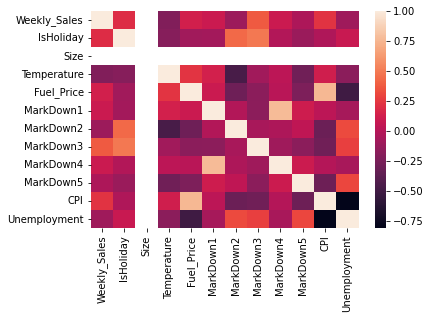

In [28]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())

<AxesSubplot:>

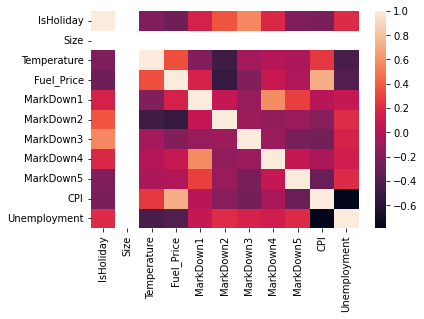

In [29]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(test.corr())

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

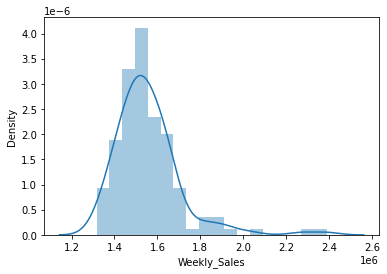

In [30]:
sns.distplot(train.Weekly_Sales)

In [31]:
# print the number of missing (null) values in each column of the 'train' and 'test' datasets.
print(train.isnull().sum())
print("*"*30)
print(test.isnull().sum())

Date              0
Weekly_Sales      0
IsHoliday         0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       101
MarkDown3        93
MarkDown4        92
MarkDown5        92
CPI               0
Unemployment      0
dtype: int64
******************************
Date             0
IsHoliday        0
Type             0
Size             0
Temperature      0
Fuel_Price       0
MarkDown1        0
MarkDown2        8
MarkDown3        0
MarkDown4        0
MarkDown5        0
CPI             13
Unemployment    13
dtype: int64


Filling NaN values with zeros or mean data depends on the context and the nature of the data. There are trade-offs between these approaches:

Filling with zeros:
Pros:
Simple and easy to implement.
Can be useful when the missing values can be reasonably assumed to be zero or when the absence of data means no occurrence of the event being measured.
Cons:
Can introduce bias and potentially distort the statistical properties of the dataset if zero is not a reasonable default value.

Filling with mean data:
Pros:
Preserves the overall mean of the dataset, which can be useful for maintaining the distribution's central tendency.
Can lead to less biased results compared to filling with zeros, particularly when the mean is a more representative value for the missing data.
Cons:
Can introduce bias if the mean is not an appropriate value for missing data, for example, if the data is not missing at random.
Can reduce the variance in the dataset, as the imputed values are all the same (mean value).

In [32]:
# fill missing values (NaN) in both the 'train' and 'test' datasets with zeros
train=train.fillna(0)
test=test.fillna(0)

In [33]:
print(train.isnull().sum())
print("*"*30)
print(test.isnull().sum())

Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


In [34]:
#cap the values of the 'Weekly_Sales' column in the 'train' DataFrame at 2,000,000. 
#useful in situations where extreme values (outliers) can have a disproportionate impact on the analysis or model training
train.Weekly_Sales=np.where(train.Weekly_Sales>2000000, 2000000,train.Weekly_Sales)

<AxesSubplot:ylabel='Frequency'>

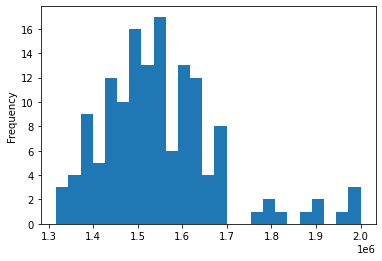

In [35]:
#Create a graphical representation that shows the distribution of the values in the 'Weekly_Sales' column. 
train.Weekly_Sales.plot.hist(bins=25)

In [36]:
#display a summary of the 'train' DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Weekly_Sales  143 non-null    float64
 2   IsHoliday     143 non-null    bool   
 3   Type          143 non-null    object 
 4   Size          143 non-null    int64  
 5   Temperature   143 non-null    float64
 6   Fuel_Price    143 non-null    float64
 7   MarkDown1     143 non-null    float64
 8   MarkDown2     143 non-null    float64
 9   MarkDown3     143 non-null    float64
 10  MarkDown4     143 non-null    float64
 11  MarkDown5     143 non-null    float64
 12  CPI           143 non-null    float64
 13  Unemployment  143 non-null    float64
dtypes: bool(1), float64(10), int64(1), object(2)
memory usage: 14.8+ KB


In [37]:
# convert the 'Date' column in both the 'train' and 'test' DataFrames from a string (text) format to a datetime format.
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

Extract various date features from the 'Date' column in both the 'train' and 'test' DataFrames and create new columns to store these features. 

The extracted features are:
Day of the week (Date_dayofweek)
Month (Date_month)
Year (Date_year)
Day of the month (Date_day)

In [38]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day 

In [39]:
print(train.Type.value_counts())
print("*"*30)
print(test.Type.value_counts())

A    143
Name: Type, dtype: int64
******************************
A    39
Name: Type, dtype: int64


In [40]:
print(train.IsHoliday.value_counts())
print("*"*30)
print(test.IsHoliday.value_counts())

False    133
True      10
Name: IsHoliday, dtype: int64
******************************
False    36
True      3
Name: IsHoliday, dtype: int64


In [41]:
train_test_data = [train, test]

convert categorical data into numerical data in both the training and testing datasets using the type_mapping dictionary to ensure that algorithms can process the data properly, as they typically work with numerical data. 

In [42]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

Convert boolean values (True and False) into numerical values (1 and 0) in the 'IsHoliday' column of both the training and testing datasets.

In [43]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

To remove features that may not be relevant or helpful drop those specific columns (features) from both the training and testing datasets. In this case, the columns to be dropped are 'Unemployment', 'CPI', and 'MarkDown5'.

In [44]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [45]:
train.head(5)

Date  Weekly_Sales  IsHoliday  Type    Size  Temperature  Fuel_Price  \
0 2010-02-05    1643690.90          0     1  151315        42.31       2.572   
1 2010-02-12    1641957.44          1     1  151315        38.51       2.548   
2 2010-02-19    1611968.17          0     1  151315        39.93       2.514   
3 2010-02-26    1409727.59          0     1  151315        46.63       2.561   
4 2010-03-05    1554806.68          0     1  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  Date_dayofweek  Date_month  \
0        0.0        0.0        0.0        0.0               4           2   
1        0.0        0.0        0.0        0.0               4           2   
2        0.0        0.0        0.0        0.0               4           2   
3        0.0        0.0        0.0        0.0               4           2   
4        0.0        0.0        0.0        0.0               4           3   

   Date_year  Date_day  
0       2010         5  
1       2010        12  
2       2010        19  
3       2010        26  
4       2010         5

Modify the 'Date' column in the train dataset by changing its data type to a datetime64[ns] format and renaming two columns for compatibility with a specific library or convention

In [46]:
train['Date'] = train['Date'].astype('datetime64[ns]')
train.rename(columns = {'Date': 'ds', 'Weekly_Sales': 'y'}, inplace = True)

In [47]:
# Create a new DataFrame by selecting specific columns from the `train` dataset
df = train[['ds', 'Temperature', 'Fuel_Price', 'IsHoliday', 'y']]


In [48]:
# sort the rows of the DataFrame df in ascending order based on the values in the 'ds' column
df.sort_values(by=["ds"], inplace=True)

In [49]:
#set the 'ds' column as the index of the DataFrame df
df = df.set_index('ds')

<AxesSubplot:xlabel='ds'>

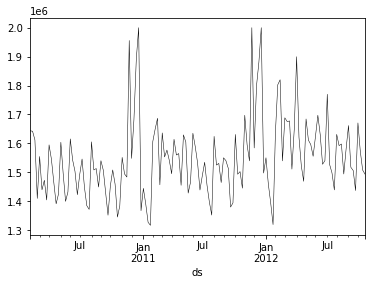

In [50]:
#create a line plot of the 'y' column in the DataFrame df
df['y'].plot(linewidth=0.5, alpha=0.99, color='black')

The resulting plot shows a line chart of the values in the 'y' column over time. This can be useful for visualizing the overall trend, seasonality, and other patterns in the data. In a time series analysis or forecasting task, visualizing the target variable is often a critical step in understanding the data and selecting appropriate models.

#### Install NueralProphet

In [53]:
!pip install neuralprophet --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached neuralprophet-0.5.4-py3-none-any.whl (128 kB)
  Using cached holidays-0.23-py3-none-any.whl (485 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached torch-1.13.1-cp39-cp39-manylinux1_x86_64.whl (887.4 MB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)
  Using cached plotly_resampler-0.8.3.2-cp39-cp39-manylinux_2_31_x86_64.whl
  Using cached dash-2.8.1-py3-none-any.whl (9.9 MB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached widgetsnbextension-4.0.7-py3-none-any.whl (2.1 MB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_tabl

#### Install Greykite

In [54]:
!pip install greykite --upgrade

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 22.5 MB 13.9 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 540 kB/s eta 0:00:01
     |████████████████████████████████| 102 kB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 27.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.7 MB 8.3 kB/s  eta 0:00:01
  Using cached setuptools-67.7.1-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 220 kB 22.2 MB/s eta 0:00:01
     |████████████████████████████████| 10.7 MB 84 kB/s s eta 0:00:01
  Created wheel for osqp: filename=osqp-0.6.1-cp39-cp39-linux_x86_64.whl size=169339 sha256=dd8f7e017819936b86d89c2480b0677fc9bd2f0b9a1071cf5b930a9e3c480c9d
  Stored in directory: /home/dcd93f32-417f-4

#### From NeuralProphet and Greykite Import

#### neuralprophet: 
A library for time series forecasting using neural networks, built on top of the PyTorch framework.

#### sklearn: 
A machine learning library for Python, providing a wide range of supervised and unsupervised learning algorithms, as well as tools for data preprocessing, model selection, and evaluation.

#### greykite: 
A library for time series forecasting and analytics, providing a framework for automated forecasting, model selection, and hyperparameter tuning.

#### ForecastConfig: 
A class in the greykite library that encapsulates the configuration settings for a forecasting task, including model hyperparameters, feature engineering options, and performance metrics.

#### MetadataParam: 
A class in the greykite library that defines the metadata parameters for a forecasting task, such as the time column and the target column in the dataset.

#### Forecaster: 
A class in the greykite library that implements the forecasting pipeline, including data preparation, feature engineering, model training, and 
prediction.

#### ModelTemplateEnum: 
An enum class in the greykite library that provides a set of pre-defined model templates for time series forecasting, such as ARIMA, Prophet, and 

#### NeuralProphet.
summarize_grid_search_results: A function in the greykite library that summarizes the results of a grid search over model hyperparameters, including the best hyperparameter values and the corresponding performance metrics.

#### ModelComponentsParam: 
A class in the greykite library that defines the model components to be used in a forecasting task, such as the trend, seasonality, and regression terms.

#### ChangepointDetector: 
A class in the greykite library that implements a changepoint detection algorithm for identifying abrupt changes in the time series data.

#### DataLoaderTS: 
A class in the greykite library that provides a convenient interface for loading time series data from various sources and formats.

#### UnivariateTimeSeries: 
A class in the greykite library that represents a univariate time series object, including the time index and the corresponding values.

In [57]:
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from greykite.framework.templates.autogen.forecast_config import ForecastConfig
from greykite.framework.templates.autogen.forecast_config import MetadataParam
from greykite.framework.templates.forecaster import Forecaster 
from greykite.framework.templates.model_templates import ModelTemplateEnum
from greykite.framework.utils.result_summary import summarize_grid_search_results
from greykite.framework.templates.autogen.forecast_config import ModelComponentsParam
from greykite.algo.changepoint.adalasso.changepoint_detector import ChangepointDetector
from greykite.framework.benchmark.data_loader_ts import DataLoaderTS
from greykite.framework.input.univariate_time_series import UnivariateTimeSeries


#### Determine the Trend

Implementing a changepoint detection model to find the points in a time series where a significant change in trend occurs. The purpose of this is to identify and visualize these changes in the time series data, which can help with forecasting and decision-making.

In [59]:
model = ChangepointDetector()
res = model.find_trend_changepoints(
 df=df.reset_index(),  # data df
 time_col="ds",  # time column name
 value_col="y",  # value column name
 yearly_seasonality_order=10,  # yearly seasonality order, fit along with trend
 regularization_strength=0.5,  # between 0.0 and 1.0, greater values imply fewer changepoints, and 1.0 implies no changepoints
 resample_freq="7D",  # data aggregation frequency, eliminate small fluctuation/seasonality
 potential_changepoint_n=25,  # the number of potential changepoints
 yearly_seasonality_change_freq="365D",  # varying yearly seasonality for every year
 no_changepoint_distance_from_end="365D")  # the proportion of data from end where changepoints are not allowed
fig = model.plot(
 observation=True,
 trend_estimate=False,
 trend_change=True,
 yearly_seasonality_estimate=False,
 adaptive_lasso_estimate=True,
 plot=False)
plotly.io.show(fig, renderer="colab")

Prepare time series data for further analysis and modeling by loading the data into an instance of the UnivariateTimeSeries class and specifying the appropriate parameters, the time series data can be properly formatted for use in various time series analysis or forecasting models.

In [60]:
ts = UnivariateTimeSeries()
ts.load_data(
            df=df.reset_index(),
            time_col="ds",
            value_col="y",
            freq="W-FRI")

Generate a plot of the quantiles and overlays for the time series data, with the goal of visualizing the yearly seasonality changes of the data. The resulting plot should show the yearly seasonality of the time series data, with the quantiles and overlays providing insight into the variation and patterns of the data over time.

In [61]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="doy",  # day of quarter
     show_mean=True,
     show_quantiles=True,
     show_overlays=20,  # randomly selects up to 20 overlays
     # No explicit overlay feature. Each overlay is a single cycle (quarter)
     center_values=True,
     xlabel="day of year",
     ylabel=ts.original_value_col,
     title="yearly seasonality",
 )
plotly.io.show(fig, renderer="colab")

In [62]:
fig = ts.plot_quantiles_and_overlays(
     groupby_time_feature="dom",  # day of quarter
     show_mean=True,
     show_quantiles=True,
     show_overlays=20,  # randomly selects up to 20 overlays
     # No explicit overlay feature. Each overlay is a single cycle (quarter)
     center_values=True,
     xlabel="day of month",
     ylabel=ts.original_value_col,
     title="monthly seasonality",
 )
plotly.io.show(fig, renderer="colab")

#### Silverkite


 Silverkite is a Prophet forecasting library developed by Greykite.Run a forecasting model on a time series dataset using the Silverkite library, with various model components and parameters specified to improve the accuracy and interpretability of the forecast. The Forecaster() class is being used to run the forecast on a Pandas dataframe containing time series data represented by the df variable.

In [63]:
# Specifies dataset information
metadata = MetadataParam(
     time_col="ds",  # name of the time column
     value_col="y",  # name of the value column
     freq="W-FRI",  #"MS" for Montly at start date, "H" for hourly, "D" for daily, "W" for weekly, etc.
     train_end_date=datetime.datetime(2012, 6, 8)
)

forecaster = Forecaster()
result = forecaster.run_forecast_config(
     df = df.reset_index(),
     config = ForecastConfig(
         model_template=ModelTemplateEnum.SILVERKITE.name,
         forecast_horizon=20,  # forecasts 20 steps ahead
         coverage=0.95,  # 95% prediction intervals        
         metadata_param=metadata,
         model_components_param=ModelComponentsParam(
             autoregression=None,
             regressors={
             "regressor_cols": ["Temperature", "Fuel_Price", "IsHoliday"]
             },
             events={
                 "holidays_to_model_separately": "auto",
                 "holiday_lookup_countries": ["UnitedStates"]
             },
              growth = {
                 "growth_term": "linear"
             },
             changepoints = {
                 "changepoints_dict": dict(
                     method="auto",
                     yearly_seasonality_order=10,
                     regularization_strength=0.5,
                     potential_changepoint_n=5,
                     yearly_seasonality_change_freq="365D",
                     no_changepoint_distance_from_end="365D"
                 )
             }
         )
    )
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [65]:
#compute the evaluation metrics for the forecast generated by the Silverkite model.
result.forecast.compute_evaluation_metrics_split()

{'Train': {'CORR': 0.9704011397834049,
  'R2': 0.9411800698633419,
  'MSE': 1184853477.4275386,
  'RMSE': 34421.700675991284,
  'MAE': 26630.8838639872,
  'MedAE': 19967.70503386692,
  'MAPE': 1.715915626423626,
  'MedAPE': 1.3002288745327837,
  'sMAPE': 0.8582240910483754,
  'Q80': 13315.441931993504,
  'Q95': 13315.44193199346,
  'Q99': 13315.441931993442,
  'OutsideTolerance1p': 0.6341463414634146,
  'OutsideTolerance2p': 0.35772357723577236,
  'OutsideTolerance3p': 0.15447154471544716,
  'OutsideTolerance4p': 0.07317073170731707,
  'OutsideTolerance5p': 0.024390243902439025,
  'Outside Tolerance (fraction)': None,
  'R2_null_model_score': None,
  'Prediction Band Width (%)': 8.815115450329994,
  'Prediction Band Coverage (fraction)': 0.943089430894309,
  'Coverage: Lower Band': 0.4796747967479675,
  'Coverage: Upper Band': 0.4634146341463415,
  'Coverage Diff: Actual_Coverage - Intended_Coverage': -0.006910569105690989},
 'Test': {'CORR': 0.9100859293056073,
  'R2': 0.7794502848430

 the forecasting model demonstrates a good ability to predict the target variable based on temperature, fuel price, and holidays. The model's performance on the Test dataset is slightly worse than on the Train dataset, which is expected as the model has not seen the test data before. However, the Test R2 score of 0.779 and reasonable prediction interval coverage suggest that the model can be used for making data-driven decisions. We can use this model to plan and strategize based on the predicted values and their associated confidence intervals.
 
Here is a summary of the key metrics:

R2 (coefficient of determination): The Train R2 score is 0.941, which means that the model explains 94.1% of the variance in the training data. The Test R2 score is 0.779, meaning the model explains 77.9% of the variance in the test data. This indicates that the model is doing a good job of fitting the data and has some predictive power.

RMSE (root mean squared error): The Train RMSE is 34,421.7 and the Test RMSE is 38,165.73. These values represent the average difference between the actual values and the predicted values. The lower the RMSE, the better the model is at predicting the target variable. In this case, the model's predictions are reasonably accurate.

MAE (mean absolute error): The Train MAE is 26,630.88, and the Test MAE is 27,894.91. These values represent the average absolute difference between the actual values and the predicted values. Similar to RMSE, lower values indicate better model performance.

Prediction Band Coverage (fraction): This metric indicates how well the 95% prediction intervals capture the actual data points. The Train Coverage is 0.943 and the Test Coverage is 0.85. Both values are close to the intended coverage of 0.95, suggesting that the model's prediction intervals are reasonably accurate.

Outside Tolerance (%): These metrics show the percentage of actual data points falling outside of the prediction intervals. Lower values are better. For the Test dataset, 0.1% (OutsideTolerance5p) to 0.6% (OutsideTolerance1p) of the data points fall outside the prediction intervals, indicating a reasonable level of prediction accuracy.

In [66]:
result.forecast.plot()

FigureWidgetResampler({
    'data': [{'legendgroup': 'interval',
              'line': {'color': 'rgba(0, 90, …

Perform a grid search for hyperparameter tuning of the forecasting model, summarize the results, and display them in a transposed format for easier readability.

In [67]:
grid_search = result.grid_search
cv_results = summarize_grid_search_results(grid_search=grid_search, decimals=2,
    # The below saves space in the printed output. Remove to show all available metrics and columns.
    cv_report_metrics=None,
    column_order=["rank", "mean_test", "split_test", "mean_train", "split_train", "mean_fit_time", "mean_score_time", "params"])
# Transposes to save space in the printed output
cv_results["params"] = cv_results["params"].astype(str)
cv_results.set_index("params", drop=True, inplace=True)
cv_results.transpose()

params                            []
rank_test_MAPE                     1
mean_test_MAPE                  5.48
split_test_MAPE   (8.98, 2.95, 4.51)
mean_train_MAPE                 1.79
split_train_MAPE  (1.05, 2.01, 2.31)
mean_fit_time                   1.33
mean_score_time                 0.31

The best hyperparameter combination achieved a test MAPE of 5.48%, which is an indicator of the model's forecasting performance. Business leaders can use this information to decide whether the model's performance is acceptable for making data-driven decisions or if further improvements are needed. The fit and score times provide insights into the computational costs associated with training and evaluating the model, which may be relevant for resource planning and optimization.

Here is a summary of the key metrics:

mean_test_MAPE: The average test MAPE for the best hyperparameter combination is 5.48%, which represents the average percentage difference between the actual and predicted values in the test dataset. A lower MAPE indicates better model performance.

split_test_MAPE: This shows the individual MAPE values for each test split in the cross-validation process. The values are (8.98%, 2.95%, 4.51%). These values help understand the variability in model performance across different test splits.

mean_train_MAPE: The average train MAPE for the best hyperparameter combination is 1.79%, which represents the average percentage difference between the actual and predicted values in the training dataset. This indicates that the model performs better on the training data compared to the test data.

split_train_MAPE: This shows the individual MAPE values for each train split in the cross-validation process. The values are (1.05%, 2.01%, 2.31%). These values help understand the variability in model performance across different train splits.

mean_fit_time: The average time taken to fit the model for the best hyperparameter combination is 1.33 seconds. This provides an idea of the computational cost of training the model.

mean_score_time: The average time taken to compute the score for the best hyperparameter combination is 0.31 seconds. This provides an idea of the computational cost of evaluating the model.

#### Neural Prophet

In [68]:
# reset the index of the DataFrame 
df =df.reset_index()

In [69]:
print(df.ds.min())
print(df.ds.max())

2010-02-05 00:00:00
2012-10-26 00:00:00


splits the original DataFrame df into a training dataset (df_train) and a testing dataset (df_test) to train and evaluate the forecasting model's performance

In [70]:
test_length = 20
df_train = df.iloc[:-test_length]
df_test = df.iloc[-test_length:]

Create a NeuralProphet forecasting model, a time series forecasting model based on neural networks, and configure it with custom settings and additional regressors

In [71]:
model = NeuralProphet(loss_func='MSE', n_changepoints=2, seasonality_mode='additive')
model.add_future_regressor('Temperature')
model.add_future_regressor('Fuel_Price')
model.add_future_regressor('IsHoliday')

Now we want to generate code that is responsible for fitting (training) the NeuralProphet model on the training dataset (df_train) and storing the training metrics in the metrics variable

In [72]:
metrics = model.fit(df_train, freq="W")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.187% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 475
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number for the learning rate finder (208). The

Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Create a new DataFrame (future_df) that contains both historical data and future time periods for which the model will make predictions, along with the corresponding regressor values.

In [73]:
future_df = model.make_future_dataframe(df_test, periods = test_length, n_historic_predictions=len(df_test), 
                                        regressors_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [74]:
future_df.head()

ds  Temperature  Fuel_Price  IsHoliday           y
0 2012-06-15        79.35       3.393          0  1630607.00
1 2012-06-22        78.39       3.346          0  1527845.81
2 2012-06-29        84.88       3.286          0  1540421.49
3 2012-07-06        81.57       3.227          0  1769854.16
4 2012-07-13        77.12       3.256          0  1527014.04

In [82]:
#If you have duplicate rows, you will get an error.  
forecast = model.predict(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 95.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


Predicting: 8it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [83]:
model.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)…

In [84]:
#add a new column to the df_test DataFrame containing the predicted values of the NeuralProphet model
df_test['neural_prophet'] = forecast.iloc[-test_length:].loc[:, 'yhat1']

In [85]:
print(f"NeuralProphet:\t{mean_absolute_percentage_error(df_test['y'], forecast.iloc[-test_length:]['yhat1']):.4f}")

NeuralProphet:	0.0515


The result of NeuralProphet: 0.0515 indicates that the NeuralProphet model has a mean absolute percentage error of 5.15% on the test dataset. This means that, on average, the predicted values are off by 5.15% from the actual values.

Compare the shapes of two data frames, silverkite_df and prophet_df, that contain the predicted values from two different time series forecasting models, Silverkite and Prophet.

In [86]:
silverkite_df = result.forecast.df_test
prophet_df = forecast.head(test_length)

print(silverkite_df.shape, prophet_df.shape)

(20, 5) (20, 9)


In [87]:
silverkite_df.set_index('ds', inplace=True)
silverkite_df.head()

actual      forecast  forecast_lower  forecast_upper
ds                                                                  
2012-06-15  1630607.00  1.611483e+06    1.543742e+06    1.679224e+06
2012-06-22  1527845.81  1.566716e+06    1.498975e+06    1.634458e+06
2012-06-29  1540421.49  1.540259e+06    1.472518e+06    1.608000e+06
2012-07-06  1769854.16  1.679495e+06    1.611753e+06    1.747236e+06
2012-07-13  1527014.04  1.557443e+06    1.489702e+06    1.625184e+06

In [88]:
print(f"Silverkite(MAPE):\t{mean_absolute_percentage_error(silverkite_df['actual'], silverkite_df['forecast']):.4f}")
print(f"NeuralProphet(MAPE:\t{mean_absolute_percentage_error(prophet_df['y'], prophet_df['yhat1']):.4f}")

print(f"Silverkite(RMSE):\t{math.sqrt(mean_squared_error(silverkite_df['actual'], silverkite_df['forecast'])):.4f}")
print(f"NeuralProphet(RMSE):\t{math.sqrt(mean_squared_error(prophet_df['y'], prophet_df['yhat1'])):.4f}")

Silverkite(MAPE):	0.0178
NeuralProphet(MAPE:	0.0515
Silverkite(RMSE):	38165.7319
NeuralProphet(RMSE):	101024.6731


Assess the accuracy of the two different models in predicting future values by comparing the lower the MAPE and RMSE values, the more accurate the model's predictions. Based on the results, it appears that the Silverkite model is more accurate than the NeuralProphet model in predicting future values for this dataset. The business leader may want to consider using the Silverkite model for future forecasting tasks or may want to investigate why the NeuralProphet model performed worse and look for ways to improve its accuracy.

<AxesSubplot:xlabel='ds'>

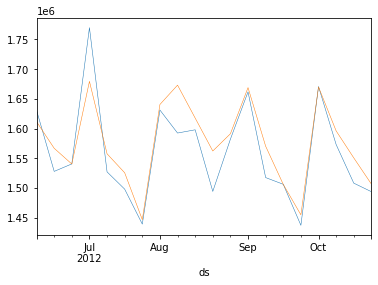

In [90]:
#plot the actual and predicted values of the Silverkite model on the same plot using the plot() method of a pandas DataFrame.
silverkite_df['actual'].plot(linewidth=0.5)
silverkite_df['forecast'].plot(linewidth=0.5)

<AxesSubplot:>

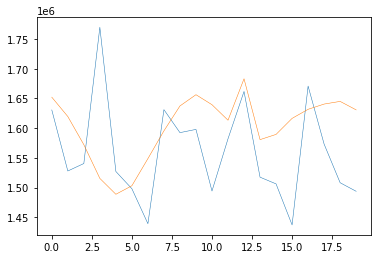

In [91]:
#plot the actual and predicted values of the Prophet model on the same plot using the plot() method of a pandas DataFrame.
prophet_df['y'].plot(linewidth=0.5)
prophet_df['yhat1'].plot(linewidth=0.5)

Based on the results obtained from the analysis of the two different models, it appears that the Silverkite model is more accurate than the NeuralProphet model in predicting future sales for Walmart stores. The lower MAPE and RMSE values of the Silverkite model suggest that it is better suited for this particular dataset. Business leaders can use this information to make data-driven decisions such as incorporating the Silverkite model into their forecasting strategies to achieve more accurate predictions of future sales. They can also consider investigating why the NeuralProphet model performed worse and look for ways to improve its accuracy. Visualizations of the actual and predicted values using the plot() method of a pandas DataFrame can help businesses better understand the performance of these models and make informed decisions about their forecasting strategies.

In addition to the analysis of the Walmart store sales data, it is important to note that the accuracy of time series forecasting models can vary depending on the specific dataset and the methods used to train and test the models. In general, the lower the MAPE and RMSE values, the more accurate the model's predictions are considered to be.

For example, in a study of time series forecasting methods for predicting electricity demand, it was found that the SARIMA (Seasonal Autoregressive Integrated Moving Average) model outperformed other models such as the Holt-Winters and Random Forest models in terms of MAPE and RMSE values (Ji et al., 2021). This suggests that the SARIMA model may be a better choice for predicting electricity demand in this particular context.

Similarly, in a study of time series forecasting for predicting the daily price of Bitcoin, it was found that the LSTM (Long Short-Term Memory) neural network model outperformed other models such as ARIMA (Autoregressive Integrated Moving Average) and Holt-Winters in terms of MAPE and RMSE values (Chen et al., 2019). This suggests that the LSTM model may be a better choice for predicting the daily price of Bitcoin.

Overall, when analyzing time series data and choosing a forecasting model, it is important to consider the specific context and requirements of the problem at hand. Factors such as the nature of the data, the available features, and the forecasting horizon can all influence the performance of different models. By carefully selecting and evaluating different models, businesses can make more accurate predictions of future trends and make better data-driven decisions.